## Practical Work 1

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [52]:
import numpy as np
import  matplotlib.pyplot as plt
import pandas as pd


#### Read RegData csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [53]:
path = 'RegData.csv'
data=np.loadtxt(path,delimiter=',')


#### Explore your data

In [54]:
data

array([[2.9000001 , 4.        ],
       [6.69999981, 7.4000001 ],
       [4.9000001 , 5.        ],
       [7.9000001 , 7.19999981],
       [9.80000019, 7.9000001 ],
       [6.9000001 , 6.0999999 ],
       [6.0999999 , 6.        ],
       [6.19999981, 5.80000019],
       [6.        , 5.19999981],
       [5.0999999 , 4.19999981],
       [4.69999981, 4.        ],
       [4.4000001 , 4.4000001 ],
       [5.80000019, 5.19999981]])

#### Define variables X and y. Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [55]:
X_data=data[:,0:1]
Y_data=data[:,1:]

#### Explore your data

In [56]:
X_data

array([[2.9000001 ],
       [6.69999981],
       [4.9000001 ],
       [7.9000001 ],
       [9.80000019],
       [6.9000001 ],
       [6.0999999 ],
       [6.19999981],
       [6.        ],
       [5.0999999 ],
       [4.69999981],
       [4.4000001 ],
       [5.80000019]])

In [57]:
Y_data

array([[4.        ],
       [7.4000001 ],
       [5.        ],
       [7.19999981],
       [7.9000001 ],
       [6.0999999 ],
       [6.        ],
       [5.80000019],
       [5.19999981],
       [4.19999981],
       [4.        ],
       [4.4000001 ],
       [5.19999981]])

#### Plot the original data (scatter plot of X,y)

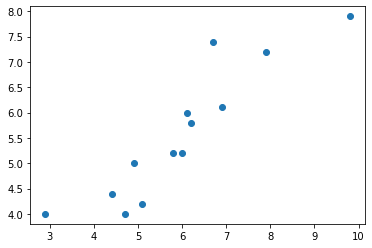

In [58]:
plt.scatter(X_data,Y_data,)
plt.show()

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate. 

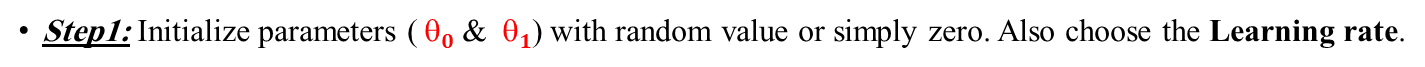

In [59]:
theta_0=0
theta_1=0
alpha=.001

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.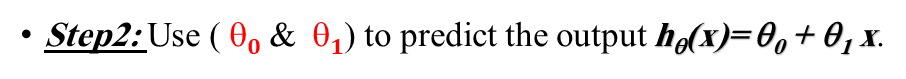
#### Note: you will need to iterate through all data points

In [60]:
Y_predicted=theta_0+theta_1*X_data
Y_predicted

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

### Step3: Calculate Cost function 𝑱(theta_0,theta_1 ).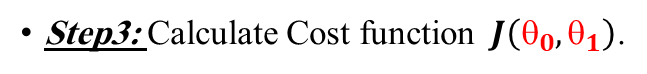
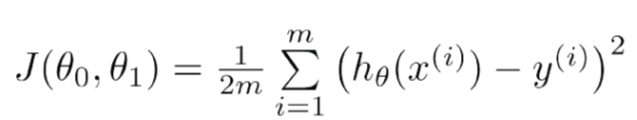

In [61]:
cost_func=np.sum(np.power(Y_predicted-Y_data,2))/(2*len(X_data))
cost_func

16.305384479692318

### Step4: Calculate the gradient.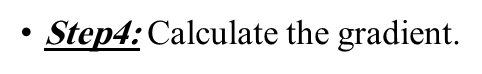
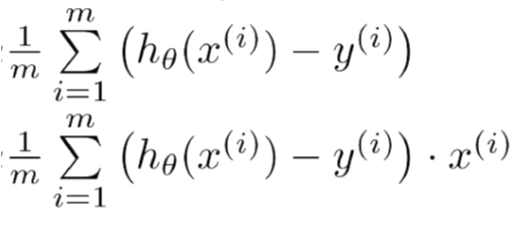

In [62]:
gradient_0=np.sum(Y_predicted-Y_data)/(len(X_data))
print("gradient_0= ",gradient_0)
gradient_1=np.sum((Y_predicted-Y_data)*X_data)/(len(X_data))
print("gradient_1= ",gradient_1)

gradient_0=  -5.56923073976923
gradient_1=  -35.043846043215375


### Step5: Update the parameters (simultaneously).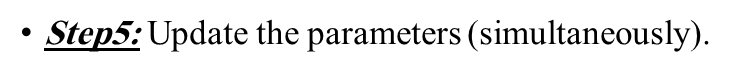
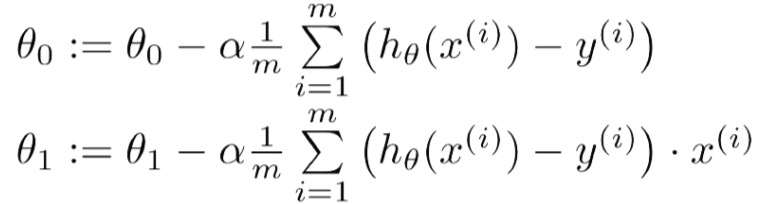

In [63]:
theta_0=theta_0-alpha*gradient_0
print("theta_0= ",theta_0)
theta_1=theta_1-alpha*gradient_1
print("theta_1= ",theta_1)

theta_0=  0.00556923073976923
theta_1=  0.03504384604321537


### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.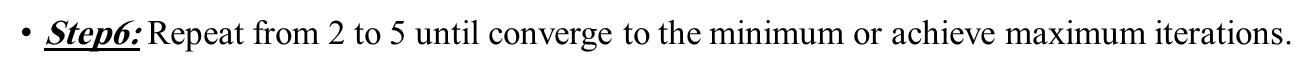

In [65]:
cost_array=[]
th0_array=[]
th1_array=[]
n=100
for i in range(n):
    th0_array.append(theta_0)
    th1_array.append(theta_1)
    y_per=theta_0+theta_1*X_data
    cost=np.sum(np.power(y_per-Y_data,2))/2*len(X_data)
    cost_array.append(cost)
    g1=np.sum(y_per-Y_data)/len(X_data)
    g2=np.sum((y_per-Y_data)*X_data)/len(X_data)
    theta_0=theta_0-(alpha*g1)
    theta_1=theta_1-(alpha*g2)
    
    
# y_predict=[]
# for i in X_data:
#         Y=theta_0+(theta_1*i)
#         y_predict.append(Y)
# print("y_predict =",y_predict)

# loss_value=0
# j=0
# for i in X:
#         Y=theta0+(theta1*i)
#         loss_value+=((Y-y[j])**2)
#         j+=1
# loss_value/=(2*m)
# all_losses.append(loss_value)

# print("\nlosses =",all_losses)   



#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [77]:
Y_predicted=theta_0+theta_1*X_data
Y_predicted
print(Y_predicted)

[[2.69886042]
 [6.04281579]
 [4.45883706]
 [7.09880203]
 [8.77077993]
 [6.21881371]
 [5.51482288]
 [5.60282163]
 [5.42682414]
 [4.63483456]
 [4.28283915]
 [4.0188429 ]
 [5.25082664]]


#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

(13, 1)
(13, 1)


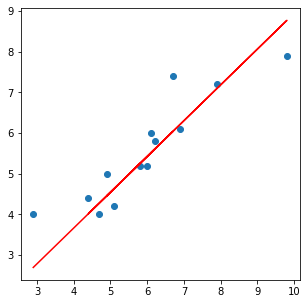

In [78]:
print(np.shape(X_data))
print(np.shape(Y_predicted))
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(X_data, Y_predicted, 'r')
ax.scatter(X_data, Y_data, label='Traning Data')
plt.show()

#### Use R2 score to evaluate LR equation output
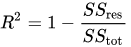
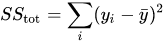
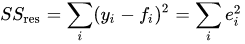
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [84]:
from sklearn.metrics import r2_score
r2_score=r2_score(Y_data,Y_predicted)
print("r2_score= ",r2_score)

r2_score=  0.7417438156159839


## GD vectorize Implementation
### Implement GD without iterate through data points i.e. use vector operations

In [ ]:
# cost_array=[]
# th0_array=[]
# th1_array=[]
# n=100
# for i in range(n):
#     th0_array.append(theta_0)
#     th1_array.append(theta_1)
#     y_per=theta_0+theta_1*X_data
#     cost=np.sum(np.power(y_per-Y_data,2))/2*len(X_data)
#     cost_array.append(cost)
#     g1=np.sum(y_per-Y_data)/len(X_data)
#     g2=np.sum((y_per-Y_data)*X_data)/len(X_data)
#     theta_0=theta_0-(alpha*g1)
#     theta_1=theta_1-(alpha*g2)

#### Plot the output and calculate R2 score
##### Make sure that you obtained the same results

In [120]:
from sklearn.metrics import r2_score
r2_score=r2_score(Y_data,Y_predicted)
print("r2_score= ",r2_score)

r2_score=  0.7417438156159839


## Plot loss function
### Repeat your last vectorized implementaion version and save loss for each iteration (epoch)

In [85]:
cost_array

[2354.3499095086795,
 2176.4833471131055,
 2012.2517426399356,
 1860.6098544743143,
 1720.5925681316019,
 1591.3087537952802,
 1471.9355947295885,
 1361.7133504701192,
 1259.940521462753,
 1165.9693843763212,
 1079.2018696735342,
 999.0857552030191,
 925.1111515866105,
 856.8072570331825,
 793.7393609250621,
 735.5060771063769,
 681.7367892646279,
 632.0892921466423,
 586.2476135964473,
 543.9200035534445,
 504.8370772118833,
 468.7501005237901,
 435.42940713345104,
 404.6629366680437,
 376.25488508138193,
 350.0244584608988,
 325.8047223664848,
 303.44153937780885,
 282.79258808815035,
 263.7264573011414,
 246.12180966543792,
 229.86660942428563,
 214.85740936499514,
 200.99869243012736,
 188.20226380007662,
 176.38668957796716,
 165.47677850438166,
 155.40310340329322,
 146.10155931345653,
 137.51295549298098,
 129.58263870041094,
 122.26014535468111,
 115.49888036012857,
 109.25582055244348,
 103.49124087814326,
 98.16846156484155,
 93.25361467318156,
 88.71542854465316,
 84.5250287

### Plot loss vs. iterations

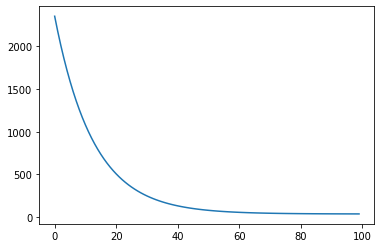

In [91]:
epochs = range(0,n)
plt.plot(epochs,cost_array)
plt.show()


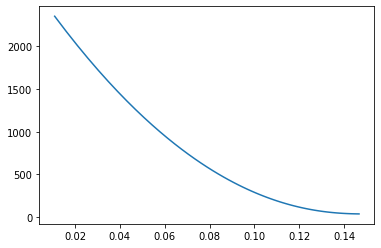

In [92]:
plt.plot(th0_array,cost_array)
plt.show()

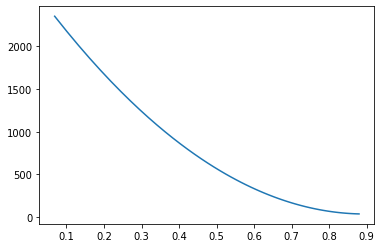

In [93]:
plt.plot(th1_array,cost_array)
plt.show()

## Multivariate LR

#### Read MultipleLR csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [101]:
path = 'MultipleLR.csv'
data2 = pd.read_csv(path, header=None, names=['X1','X2','X3','y'])
data2.insert(0, 'Ones', 1)
data2=np.array(data2)
data2

array([[  1,  73,  80,  75, 152],
       [  1,  93,  88,  93, 185],
       [  1,  89,  91,  90, 180],
       [  1,  96,  98, 100, 196],
       [  1,  73,  66,  70, 142],
       [  1,  53,  46,  55, 101],
       [  1,  69,  74,  77, 149],
       [  1,  47,  56,  60, 115],
       [  1,  87,  79,  90, 175],
       [  1,  79,  70,  88, 164],
       [  1,  69,  70,  73, 141],
       [  1,  70,  65,  74, 141],
       [  1,  93,  95,  91, 184],
       [  1,  79,  80,  73, 152],
       [  1,  70,  73,  78, 148],
       [  1,  93,  89,  96, 192],
       [  1,  78,  75,  68, 147],
       [  1,  81,  90,  93, 183],
       [  1,  88,  92,  86, 177],
       [  1,  78,  83,  77, 159],
       [  1,  82,  86,  90, 177],
       [  1,  86,  82,  89, 175],
       [  1,  78,  83,  85, 175],
       [  1,  76,  83,  71, 149],
       [  1,  96,  93,  95, 192]], dtype=int64)

In [102]:
X_data2=data2[: ,:4]
X_data2

array([[  1,  73,  80,  75],
       [  1,  93,  88,  93],
       [  1,  89,  91,  90],
       [  1,  96,  98, 100],
       [  1,  73,  66,  70],
       [  1,  53,  46,  55],
       [  1,  69,  74,  77],
       [  1,  47,  56,  60],
       [  1,  87,  79,  90],
       [  1,  79,  70,  88],
       [  1,  69,  70,  73],
       [  1,  70,  65,  74],
       [  1,  93,  95,  91],
       [  1,  79,  80,  73],
       [  1,  70,  73,  78],
       [  1,  93,  89,  96],
       [  1,  78,  75,  68],
       [  1,  81,  90,  93],
       [  1,  88,  92,  86],
       [  1,  78,  83,  77],
       [  1,  82,  86,  90],
       [  1,  86,  82,  89],
       [  1,  78,  83,  85],
       [  1,  76,  83,  71],
       [  1,  96,  93,  95]], dtype=int64)

In [103]:
Y_data2=data2[: ,4:]
Y_data2

array([[152],
       [185],
       [180],
       [196],
       [142],
       [101],
       [149],
       [115],
       [175],
       [164],
       [141],
       [141],
       [184],
       [152],
       [148],
       [192],
       [147],
       [183],
       [177],
       [159],
       [177],
       [175],
       [175],
       [149],
       [192]], dtype=int64)

### Repeat your implementation but for more than one variable

In [122]:
# theta=np.array([[0], [0],[0], [0]])
# print(theta.shape)
# #y_predict=X @theta
# #print(y_predict.shape)
# alpha=0.0001
# theta_all=[]
# losses=[]
# for epoch in range(100):
#     theta_all.append([theta])
#     y_predict=X @theta
#     error= np.subtract(y_predict,y)
#     cost = (error.T@error)/2*m
#     losses.append(cost[0,0])
#     j_theta=(X.T@error)/m
#     theta=theta - (alpha*j_theta)
    

In [111]:
thetaes=np.zeros((4,1))
print(thetaes)
th0_m=[]
th1_m=[]
th2_m=[]
th3_m=[]
a=.0001
m=X_data2.shape[0]
m
n=100
loss2=[]
for i in range(n):
    h=np.dot(X_data2,thetaes)
    error=h-Y_data2
    cost = (error.T@error)/2*m
    loss2.append(cost[0,0])
    g=(X_data2.T@error)/m
    thetaes=thetaes-a*g
    th0_m.append(thetaes[0])
    th1_m.append(thetaes[1])
    th2_m.append(thetaes[2])
    th3_m.append(thetaes[3])
#     print(theta)
#     print(i," ",cost)
# print(th)

[[0.]
 [0.]
 [0.]
 [0.]]


#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

In [112]:
y_predictm=X_data2@thetaes     
print(y_predictm)

[[151.12017181]
 [181.98529377]
 [179.11220591]
 [195.29962115]
 [138.68889358]
 [102.65002619]
 [146.43582373]
 [108.89384211]
 [170.44448325]
 [158.41922109]
 [140.94933492]
 [139.22392883]
 [184.81521659]
 [153.32590811]
 [147.18738084]
 [184.86167878]
 [145.84938059]
 [175.80277717]
 [176.1035046 ]
 [157.5747396 ]
 [171.68708628]
 [170.93140774]
 [163.5937908 ]
 [151.82361817]
 [188.44151014]]


### Plot loss vs. iterations

(100,)
(100,)


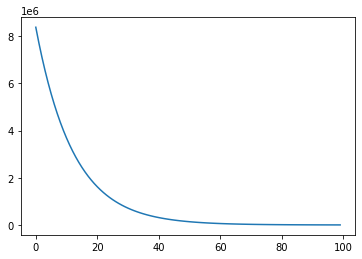

In [113]:
iter = range(0,n)
print(np.shape(iter))
print(np.shape(loss2))
plt.plot(iter,loss2)
plt.show()

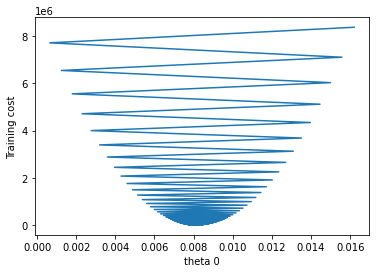

In [152]:
plt.plot(th0_m,loss2)
plt.xlabel("theta 0")
plt.ylabel("Training cost")
plt.show()

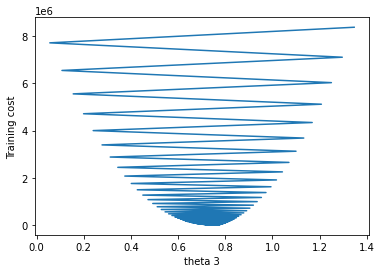

In [155]:
plt.plot(th3_m,loss2)
plt.xlabel("theta 3")
plt.ylabel("Training cost")
plt.show()

#### Use R2 score to evaluate LR equation output

In [117]:
from sklearn.metrics import r2_score
r2_score=r2_score(Y_data2,y_predictm)
print("r2_score= ",r2_score)

r2_score=  0.969062423663015


# Bonus
## LR Using sklearn

### Single Variable

#### Build a LR model usin linearmodel.LinearRegression() from sklearn library

In [125]:
from sklearn.linear_model import LinearRegression


#### Train the model (fit the model to the training data)

In [135]:
reg = LinearRegression().fit(X_data.reshape(-1, 1), Y_data)


#### Predict y values using the trained model

In [136]:
yregpredicted=reg.predict(X_data)
yregpredicted

array([[3.44824549],
       [6.08745623],
       [4.83730388],
       [6.92089146],
       [8.240497  ],
       [6.22636227],
       [5.67073878],
       [5.74019163],
       [5.60128593],
       [4.97620959],
       [4.69839784],
       [4.49003928],
       [5.46238022]])

#### Plot model output (fitted line) with the original data (scatter plot of X,y)

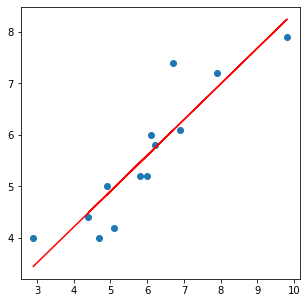

In [137]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(X_data, yregpredicted, 'r')
ax.scatter(X_data, Y_data, label='Traning Data')
plt.show()

#### Use R2 score to evaluate model output

In [138]:
reg.score(X_data.reshape(-1, 1), Y_data)

0.8213156778363777

### Repeat for Mulivariate

In [144]:
regm = LinearRegression().fit(X_data2, Y_data2)

In [145]:
yregpredictedm=regm.predict(X_data2)
yregpredictedm

array([[152.60720439],
       [185.08011472],
       [181.78158547],
       [199.74522647],
       [139.1747207 ],
       [103.69391793],
       [150.2632274 ],
       [112.82069728],
       [174.55948394],
       [164.49442094],
       [143.42337551],
       [142.23416416],
       [186.54285759],
       [152.40794527],
       [151.24409108],
       [189.12496613],
       [143.50219218],
       [181.89389361],
       [177.29838914],
       [158.34934019],
       [176.57742415],
       [174.66365778],
       [167.68889392],
       [150.63279846],
       [191.1954116 ]])

In [151]:
regm.score(X_data2, Y_data2)

0.9896615789448399